In [151]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import math

# Load  and clean bicimad data.

In [37]:
july20 = pd.read_json('202007_movements.json',encoding='latin1', lines=True)

In [41]:
july20

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code
0,{'$oid': '5f024d791b913148f0c5edbf'},cafafe19422232e54824992f88e4130ce79e0be3dbc950...,14,1,18,364,169,0,149,2020-07-01T00:00:00Z,
1,{'$oid': '5f024d791b913148f0c5edc2'},65840c389f151ecd831c3e713702db59f87af359d4aafa...,18,1,18,300,92,0,166,2020-07-01T00:00:00Z,
2,{'$oid': '5f024d791b913148f0c5edc6'},3970b96213e9f2a02ca7ffb991840c20dff1d531c2bf51...,13,1,19,383,49,0,128,2020-07-01T00:00:00Z,
3,{'$oid': '5f024d791b913148f0c5edc9'},57835e7ffe00d64403b1ae95b6d66db22f4ced98f0393f...,13,1,24,418,18,0,122,2020-07-01T00:00:00Z,
4,{'$oid': '5f024d791b913148f0c5edca'},c3c4cdc1eafed3699ad8114011ba7bd25505fc1eafe386...,3,1,16,263,183,5,185,2020-07-01T00:00:00Z,28026
...,...,...,...,...,...,...,...,...,...,...,...
431125,{'$oid': '5f2b2bff1b913144288b98bb'},5cdfb73390bdc90bdb2e5333e30da50f86694a664e555e...,2,1,8,266,44,5,134,2020-07-31T23:00:00Z,28005
431126,{'$oid': '5f2b2c031b913144288b9b31'},5794657a9599137a70f41b1fa930a5d540bee677d017e7...,6,1,4,893,132,0,131,2020-07-31T23:00:00Z,
431127,{'$oid': '5f2b2c041b913144288b9b92'},4296d62ccc043b50a282c0f999ce5ee3274b43f357d494...,8,1,17,1282,175,4,82,2020-07-31T23:00:00Z,10600
431128,{'$oid': '5f2b2c0b1b913144288ba02c'},73d00c6edafe946b030bd4362edd73dd1bec80fed6bf7b...,19,1,21,1354,40,5,202,2020-07-31T23:00:00Z,28006


In [43]:
def clean_monthly_data(x):
    #change datetime column to date, hour, and weekday
    x['unplug_hourTime'] = pd.to_datetime(x['unplug_hourTime'])
    x['date'] =x['unplug_hourTime'].dt.date
    x['hour'] =x['unplug_hourTime'].dt.hour
    x['hour'] = pd.Categorical(x['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)
    x['weekday'] = x['unplug_hourTime'].dt.weekday
    x['weekday'] = pd.Categorical(x['weekday'], categories=[0,1,2,3,4,5,6], ordered=True)
    #drop unnecessary columns
    x.drop(['_id', 'idplug_base', 'idunplug_base', 'unplug_hourTime'], axis=1, inplace=True) #dropping _id(redundant with index), idplug_base(unnecessary info), idunplug_base(unnecessary info))
    #drop rows with station 2008,2009 (repair stations)
    x = x[(x.idunplug_station!=2009) | (x.idunplug_station!=2008) | (x.idplug_station!=2009) | (x.idplug_station!=2008)]

    return x

In [44]:
july20 = clean_monthly_data(july20)

In [46]:
#fix date column
def fix_date(x):
    return pd.to_datetime(x).date()


In [48]:
july20.date = july20.date.apply(fix_date)

In [49]:
def open_clean(f):
    df = pd.read_json(f,encoding='latin1', lines=True)
    df = clean_monthly_data(df)
    df['date'] = df['date'].apply(fix_date)
    return df

In [50]:
august20 = open_clean('202008_movements.json')

In [51]:
september20 = open_clean('202009_movements.json')

In [52]:
october20 = open_clean('202010_movements.json')

In [53]:
november20 = open_clean('202011_movements.json')

In [54]:
december20 = open_clean('202012_movements.json')

In [55]:
january21 = open_clean('202101_movements.json')

In [56]:
february21 = open_clean('202102_movements.json')

In [57]:
march21 = open_clean('202103_movements.json')

In [58]:
april21 = open_clean('202104_movements.json')

In [59]:
may21 = open_clean('202105_movements.json')

In [60]:
june21 = open_clean('202106_movements.json')

In [61]:
#concatenate dataframes into one

data = pd.concat([july20, august20, september20, october20, november20, december20, 
                  january21, february21, march21, april21, may21, june21], axis=0)


In [63]:
data

,user_day_code,user_type,travel_time,idunplug_station,ageRange,idplug_station,zip_code,date,hour,weekday
0,cafafe19422232e54824992f88e4130ce79e0be3dbc950...,1,364,169,0,149,,2020-07-01,0,2
1,65840c389f151ecd831c3e713702db59f87af359d4aafa...,1,300,92,0,166,,2020-07-01,0,2
2,3970b96213e9f2a02ca7ffb991840c20dff1d531c2bf51...,1,383,49,0,128,,2020-07-01,0,2
3,57835e7ffe00d64403b1ae95b6d66db22f4ced98f0393f...,1,418,18,0,122,,2020-07-01,0,2
4,c3c4cdc1eafed3699ad8114011ba7bd25505fc1eafe386...,1,263,183,5,185,28026,2020-07-01,0,2
...,...,...,...,...,...,...,...,...,...,...
413365,45de608bddfda3f468ef6093c65f6246a2917ce2376e98...,1,746,234,0,84,,2021-06-27,19,6
413366,dbec6f034d41c528fd21412197518fe7d11dd0e863d965...,3,355190,268,0,268,,2021-06-28,7,0
413367,2081c1c1c6c1d9e400b611bcb244b408da53884dffcbbf...,3,603181,253,5,253,,2021-06-25,15,4
413368,dbec6f034d41c528fd21412197518fe7d11dd0e863d965...,3,13,243,0,243,,2021-06-30,8,2


# Exploratory data analysis

In [64]:
data.describe()

,user_type,travel_time,idunplug_station,ageRange,idplug_station
count,4.053220e+06,4.053220e+06,4.053220e+06,4.053220e+06,4.053220e+06
mean,1.112869e+00,1.136393e+03,1.169778e+02,1.863765e+00,1.170302e+02
std,5.457709e-01,1.582399e+04,7.098056e+01,2.185413e+00,7.060874e+01
min,1.000000e+00,-3.946600e+04,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,4.850000e+02,5.500000e+01,0.000000e+00,5.500000e+01
50%,1.000000e+00,7.400000e+02,1.160000e+02,0.000000e+00,1.170000e+02
75%,1.000000e+00,1.095000e+03,1.750000e+02,4.000000e+00,1.750000e+02
max,7.000000e+00,7.852929e+06,2.009000e+03,6.000000e+00,3.000000e+03


In [77]:
data.user_type.value_counts()/len(data) #type 1 is unknown

1    0.950329
3    0.039425
6    0.005937
2    0.004303
7    0.000005
Name: user_type, dtype: float64

In [76]:
data[data.zip_code == ''] #over half of the data set does not have zip_code info

,user_day_code,user_type,travel_time,idunplug_station,ageRange,idplug_station,zip_code,date,hour,weekday
0,cafafe19422232e54824992f88e4130ce79e0be3dbc950...,1,364,169,0,149,,2020-07-01,0,2
1,65840c389f151ecd831c3e713702db59f87af359d4aafa...,1,300,92,0,166,,2020-07-01,0,2
2,3970b96213e9f2a02ca7ffb991840c20dff1d531c2bf51...,1,383,49,0,128,,2020-07-01,0,2
3,57835e7ffe00d64403b1ae95b6d66db22f4ced98f0393f...,1,418,18,0,122,,2020-07-01,0,2
7,2f219de2fd2dd8966edc7e65476ce0d53db02869cb85cf...,1,258,143,0,149,,2020-07-01,0,2
...,...,...,...,...,...,...,...,...,...,...
413364,88e7bc52acd6bdf8fc09723c0299254ec1bbc2f6b3a22e...,3,212487,231,1,1,,2021-06-29,10,1
413365,45de608bddfda3f468ef6093c65f6246a2917ce2376e98...,1,746,234,0,84,,2021-06-27,19,6
413366,dbec6f034d41c528fd21412197518fe7d11dd0e863d965...,3,355190,268,0,268,,2021-06-28,7,0
413367,2081c1c1c6c1d9e400b611bcb244b408da53884dffcbbf...,3,603181,253,5,253,,2021-06-25,15,4


In [67]:
#check NaN values
data.isnull().sum()

user_day_code       0
user_type           0
travel_time         0
idunplug_station    0
ageRange            0
idplug_station      0
zip_code            0
date                0
hour                0
weekday             0
dtype: int64

The user_type column has 95% unknown values and the zip_code column has over half unknown values. Dropping these columns as we have this info for only a small portion of users.

In [78]:
data.drop(['user_type', 'zip_code'], axis=1, inplace=True)

<AxesSubplot:xlabel='travel_time'>

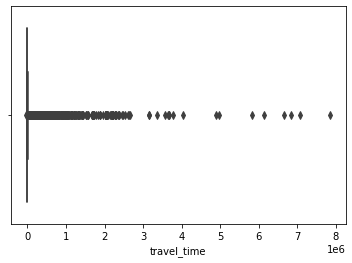

In [79]:
#check for outliers in travel_time column
sns.boxplot(x=data["travel_time"])

Some trip times are longer than 24 hours, these are extreme outliers and are posibly due to bikes malfunctioning or possibly theft. I am choosing to drop the rows with these extreme travel times. (.02% of total data)

There are also some travel times of less than 0, must be an error and dropping those as well. (only 21 rows)

I am also dropping all travel times of less than two minutes that have the same unplug and plug station, as those are likely malfunctioning bikes. 

In [80]:
data = data[(data.travel_time<86400) & (data.travel_time>0)]

data = data[~((data.travel_time<120) & (data.idunplug_station==data.idplug_station))]

## Age as a factor in usage

In [81]:
#dropping all data with 'unknown' age group label
age_data_only = data[data.ageRange != 0]

In [82]:
age_data_only

,user_day_code,travel_time,idunplug_station,ageRange,idplug_station,date,hour,weekday
4,c3c4cdc1eafed3699ad8114011ba7bd25505fc1eafe386...,263,183,5,185,2020-07-01,0,2
5,2a7ebeeb481c10c0d5d61bf9d9dccdf6ecc3597f3b7b2e...,94,7,5,8,2020-07-01,0,2
6,8e369a568e180a26394831ed1116d08671c9f2ca340445...,595,123,4,45,2020-07-01,0,2
9,2a7ebeeb481c10c0d5d61bf9d9dccdf6ecc3597f3b7b2e...,219,8,5,9,2020-07-01,0,2
25,edf2c8485efd2cd52f13951a5622554e379a873da0b74d...,893,175,1,34,2020-07-01,0,2
...,...,...,...,...,...,...,...,...
413356,5087913e7566bbc40b40ac006819fe015eb1e16d1bc760...,500,185,4,134,2021-06-30,11,2
413359,36d40b49fafe4e7f41919089b609debf52f1ee42f3e752...,841,132,5,265,2021-06-30,23,2
413360,04ea09adba4c3e5e9e9142362b0fca2187530f31834001...,1480,182,5,265,2021-06-30,21,2
413361,d26c47762f73fbdca3fefb34830f72f2df1538f9926c73...,762,15,5,265,2021-06-29,18,1


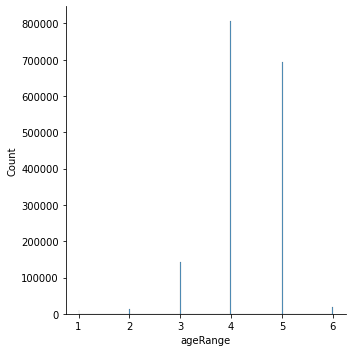

In [85]:
sns.displot(x=age_data_only.ageRange)

In [83]:
#age vs hour
age_hour_ct = pd.crosstab(age_data_only['ageRange'], age_data_only['hour'], margins = False)
st.chi2_contingency(age_hour_ct)   #age and hour of use not independent

(38332.0426495468,
 0.0,
 115,
 array([[5.78664619e+01, 3.06390723e+01, 1.99355187e+01, 1.86861701e+01,
         5.63768540e+01, 2.35550257e+02, 4.88909737e+02, 5.79655689e+02,
         4.78680695e+02, 4.39842773e+02, 4.82783123e+02, 5.69624862e+02,
         7.43981065e+02, 7.24736291e+02, 6.12721381e+02, 6.19040201e+02,
         7.45626841e+02, 8.13037605e+02, 7.34827184e+02, 5.59017412e+02,
         4.05780005e+02, 3.26380300e+02, 2.51611593e+02, 1.28688909e+02],
        [7.79688273e+01, 4.12828511e+01, 2.68609651e+01, 2.51776024e+01,
         7.59617410e+01, 3.17378610e+02, 6.58753232e+02, 7.81023633e+02,
         6.44970700e+02, 5.92640781e+02, 6.50498280e+02, 7.67508173e+02,
         1.00243438e+03, 9.76504124e+02, 8.25576092e+02, 8.34090022e+02,
         1.00465189e+03, 1.09548064e+03, 9.90100515e+02, 7.53215776e+02,
         5.46744869e+02, 4.39762314e+02, 3.39019532e+02, 1.73394449e+02],
        [8.14937430e+02, 4.31492198e+02, 2.80753304e+02, 2.63158641e+02,
         7.9395917

In [84]:
#age vs unplug station
age_station_ct = pd.crosstab(age_data_only['ageRange'], age_data_only['idunplug_station'], margins = False)
st.chi2_contingency(age_station_ct)   #age and station not independent

(87381.63374224454,
 0.0,
 1325,
 array([[4.21114557e+01, 2.19476907e+01, 4.49765484e+01, ...,
         8.99170578e+00, 1.80194505e-02, 2.46265823e-01],
        [5.67406527e+01, 2.95721502e+01, 6.06010565e+01, ...,
         1.21153555e+01, 2.42792694e-02, 3.31816682e-01],
        [5.93058576e+02, 3.09090863e+02, 6.33407876e+02, ...,
         1.26630821e+02, 2.53769181e-01, 3.46817881e+00],
        [3.35512334e+03, 1.74862654e+03, 3.58339232e+03, ...,
         7.16391333e+02, 1.43565397e+00, 1.96206043e+01],
        [2.88454737e+03, 1.50337129e+03, 3.08080027e+03, ...,
         6.15913195e+02, 1.23429498e+00, 1.68686981e+01],
        [7.94186117e+01, 4.13914716e+01, 8.48219319e+01, ...,
         1.69575897e+01, 3.39831458e-02, 4.64436326e-01]]))

In [86]:
#age vs weekday
age_day_ct = pd.crosstab(age_data_only['ageRange'], age_data_only['weekday'], margins = False)
st.chi2_contingency(age_day_ct)   #age and weekday not independent

(3941.5079338644787,
 0.0,
 30,
 array([[  1446.28314008,   1599.30431347,   1738.23427659,
           1628.98234839,   1590.60692537,   1163.83426045,
            956.75473565],
        [  1948.71081725,   2154.89037337,   2342.08354079,
           2194.87833015,   2143.17157932,   1568.14136179,
           1289.12399734],
        [ 20368.1066044 ,  22523.11449043,  24479.67487683,
          22941.07233173,  22400.62856568,  16390.35928015,
          13474.04385077],
        [115228.93776372, 127420.51130576, 138489.40344062,
         129785.03339994, 126727.56898794,  92725.54028212,
          76227.0048199 ],
        [ 99067.39510072, 109549.02806922, 119065.44236351,
         111581.91190095, 108953.27502563,  79720.23272394,
          65535.71481603],
        [  2727.56657384,   3016.15144775,   3278.16150167,
           3072.12168884,   2999.74891606,   2194.89209154,
           1804.35778031]]))

<AxesSubplot:xlabel='ageRange', ylabel='travel_time'>

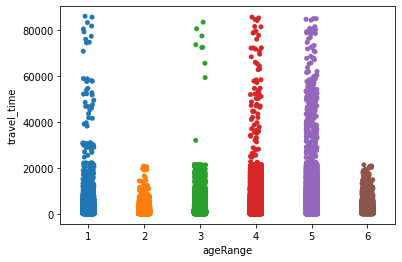

In [88]:
#age vs travel time
sns.stripplot(x="ageRange", y="travel_time", data=age_data_only)

## Factors influencing travel time

<AxesSubplot:xlabel='hour', ylabel='travel_time'>

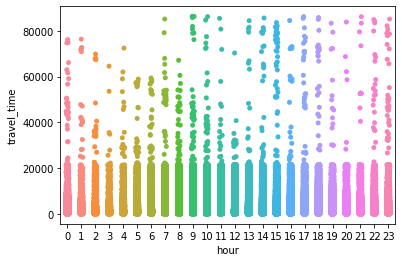

In [89]:
# hour vs travel time
sns.stripplot(x="hour", y="travel_time", data=data)

<AxesSubplot:xlabel='weekday', ylabel='travel_time'>

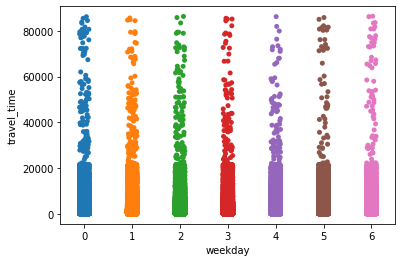

In [90]:
#weekday vs travel time
sns.stripplot(x="weekday", y="travel_time", data=data)

<AxesSubplot:xlabel='idunplug_station', ylabel='travel_time'>

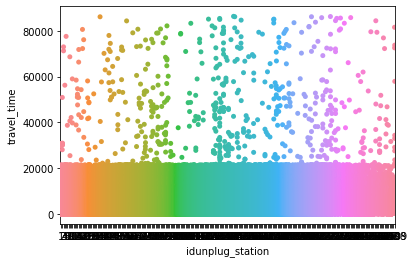

In [99]:
#station vs travel time
sns.stripplot(x="idunplug_station", y="travel_time", data=data)

Since not much demographic info is available about the riders, I will add weather data to the dataset, which includes the recoreded high and low temperatures in Madrid for each date and whether it rained/snowed or not. 

In [91]:
weather = pd.read_excel('weather.xlsx')

In [92]:
weather.set_index('date')

,high_temp,low_temp,rain
date,,,
2020-07-01,36.2,19.7,0
2020-07-02,34.0,17.8,0
2020-07-03,32.8,16.3,0
2020-07-04,35.5,16.2,0
2020-07-05,37.5,17.9,0
...,...,...,...
2021-06-26,35.0,16.1,0
2021-06-27,31.0,19.3,0
2021-06-28,29.0,12.8,0


In [93]:
weather.dtypes

date         datetime64[ns]
high_temp           float64
low_temp            float64
rain                  int64
dtype: object

In [94]:
weather.date = weather.date.apply(fix_date)

In [95]:
data = pd.merge(data, weather, how="left", on='date', sort=False)

In [96]:
data

,user_day_code,travel_time,idunplug_station,ageRange,idplug_station,date,hour,weekday,high_temp,low_temp,rain
0,cafafe19422232e54824992f88e4130ce79e0be3dbc950...,364,169,0,149,2020-07-01,0,2,36.2,19.7,0
1,65840c389f151ecd831c3e713702db59f87af359d4aafa...,300,92,0,166,2020-07-01,0,2,36.2,19.7,0
2,3970b96213e9f2a02ca7ffb991840c20dff1d531c2bf51...,383,49,0,128,2020-07-01,0,2,36.2,19.7,0
3,57835e7ffe00d64403b1ae95b6d66db22f4ced98f0393f...,418,18,0,122,2020-07-01,0,2,36.2,19.7,0
4,c3c4cdc1eafed3699ad8114011ba7bd25505fc1eafe386...,263,183,5,185,2020-07-01,0,2,36.2,19.7,0
...,...,...,...,...,...,...,...,...,...,...,...
3949476,36d40b49fafe4e7f41919089b609debf52f1ee42f3e752...,841,132,5,265,2021-06-30,23,2,34.0,15.3,0
3949477,04ea09adba4c3e5e9e9142362b0fca2187530f31834001...,1480,182,5,265,2021-06-30,21,2,34.0,15.3,0
3949478,d26c47762f73fbdca3fefb34830f72f2df1538f9926c73...,762,15,5,265,2021-06-29,18,1,31.0,13.0,0
3949479,45de608bddfda3f468ef6093c65f6246a2917ce2376e98...,746,234,0,84,2021-06-27,19,6,31.0,19.3,0


<AxesSubplot:xlabel='rain', ylabel='travel_time'>

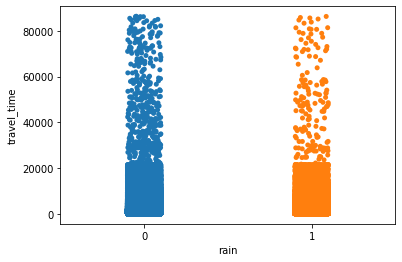

In [97]:
#rain vs travel time
sns.stripplot(x="rain", y="travel_time", data=data)

<function matplotlib.pyplot.show(close=None, block=None)>

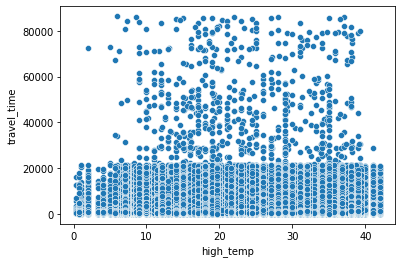

In [98]:
#high temp vs travel time
sns.scatterplot(data=data, x="high_temp", y="travel_time")
plt.show   #positive correlation between high temp and travel time

<function matplotlib.pyplot.show(close=None, block=None)>

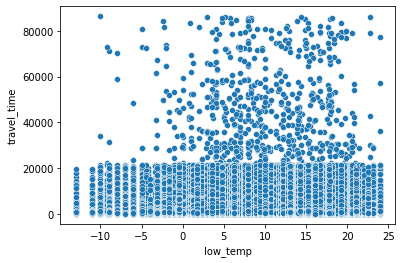

In [100]:
#low temp vs travel time
sns.scatterplot(data=data, x="low_temp", y="travel_time")
plt.show   #maybe positive correlation?

In [102]:
data.corr()

,travel_time,idunplug_station,ageRange,idplug_station,high_temp,low_temp,rain
travel_time,1.000000,0.045572,-0.024670,0.052047,-0.001041,-0.005755,-0.007469
idunplug_station,0.045572,1.000000,-0.051822,0.088045,-0.018293,-0.024642,0.009326
ageRange,-0.024670,-0.051822,1.000000,-0.052949,-0.016495,-0.016486,0.006958
idplug_station,0.052047,0.088045,-0.052949,1.000000,-0.019233,-0.025052,0.009160
high_temp,-0.001041,-0.018293,-0.016495,-0.019233,1.000000,0.873545,-0.193684
low_temp,-0.005755,-0.024642,-0.016486,-0.025052,0.873545,1.000000,0.038941
rain,-0.007469,0.009326,0.006958,0.009160,-0.193684,0.038941,1.000000


In [103]:
#high_temp and low_temp are highly correllated. I will drop low_temp
data.drop(['low_temp'], axis=1, inplace=True)

I am most interested in the factors affecting the number of users. Building a model to predict how many users will access the service per day, hour, and station would be useful in understanding user interaction with the bikeshare service. It could also give insight into particular stations that are being over- or underutilized. 

I will build the model to predict # of users using only the info that would be availbe in real time, such as day of the week, hour, and station. 

In [107]:
#making a data set with info grouped by station
station_data = data.drop(['idplug_station', 'travel_time', 'ageRange'], axis=1)
station_data['station_users']=station_data.groupby(['date','hour', 'idunplug_station']).user_day_code.transform('count')
station_data.drop(['user_day_code'], axis=1, inplace=True)
station_data = station_data.drop_duplicates()
station_data.reset_index(drop=True, inplace=True)
station_data = station_data[['date', 'weekday', 'high_temp', 'rain', 'hour', 'idunplug_station', 'station_users']]

In [108]:
station_data

,date,weekday,high_temp,rain,hour,idunplug_station,station_users
0,2020-07-01,2,36.2,0,0,169,2
1,2020-07-01,2,36.2,0,0,92,1
2,2020-07-01,2,36.2,0,0,49,2
3,2020-07-01,2,36.2,0,0,18,2
4,2020-07-01,2,36.2,0,0,183,1
...,...,...,...,...,...,...,...
1241007,2021-06-30,2,34.0,0,23,134,1
1241008,2021-06-30,2,34.0,0,22,212,1
1241009,2021-06-30,2,34.0,0,23,149,1
1241010,2021-06-30,2,34.0,0,22,199,1


In [114]:
station_daily_data= station_data.drop(['hour'], axis=1)
station_daily_data['station_daily_users'] = station_daily_data.groupby(['date']).station_users.transform('sum')
station_daily_data = station_daily_data[['date', 'weekday', 'high_temp', 'rain', 'idunplug_station', 'station_daily_users']]
station_daily_data = station_daily_data.drop_duplicates()
station_daily_data = station_daily_data.reset_index(drop=True)

In [115]:
station_daily_data

,date,weekday,high_temp,rain,idunplug_station,station_daily_users
0,2020-07-01,2,36.2,0,169,16891
1,2020-07-01,2,36.2,0,92,16891
2,2020-07-01,2,36.2,0,49,16891
3,2020-07-01,2,36.2,0,18,16891
4,2020-07-01,2,36.2,0,183,16891
...,...,...,...,...,...,...
86745,2021-06-30,2,34.0,0,222,14816
86746,2021-06-30,2,34.0,0,28,14816
86747,2021-06-30,2,34.0,0,111,14816
86748,2021-06-30,2,34.0,0,151,14816


In [117]:
hourly_data= station_data.drop(['idunplug_station'], axis=1)
hourly_data['total_hourly_users'] = hourly_data.groupby(['date','hour']).station_users.transform('sum')
hourly_data = hourly_data[['date', 'weekday', 'high_temp', 'rain', 'hour', 'total_hourly_users']]
hourly_data = hourly_data.drop_duplicates()
hourly_data = hourly_data.reset_index(drop=True)

In [118]:
hourly_data

,date,weekday,high_temp,rain,hour,total_hourly_users
0,2020-07-01,2,36.2,0,0,169
1,2020-07-01,2,36.2,0,1,81
2,2020-07-01,2,36.2,0,2,40
3,2020-07-01,2,36.2,0,3,45
4,2020-07-01,2,36.2,0,4,144
...,...,...,...,...,...,...
8725,2021-06-30,2,34.0,0,19,816
8726,2021-06-30,2,34.0,0,20,555
8727,2021-06-30,2,34.0,0,21,584
8728,2021-06-30,2,34.0,0,22,511


In [139]:
daily_data= hourly_data.drop(['hour'], axis=1)
daily_data['total_daily_users'] = hourly_data.groupby(['date']).total_hourly_users.transform('sum')
daily_data = daily_data[['date', 'weekday', 'high_temp', 'rain', 'total_daily_users']]
daily_data = daily_data.drop_duplicates()
daily_data = daily_data.reset_index(drop=True)

In [121]:
daily_data

,date,weekday,high_temp,rain,total_daily_users
0,2020-07-01,2,36.2,0,16891
1,2020-07-02,3,34.0,0,16999
2,2020-07-03,4,32.8,0,15723
3,2020-07-04,5,35.5,0,12062
4,2020-07-05,6,37.5,0,10236
...,...,...,...,...,...
360,2021-06-26,5,35.0,0,10888
361,2021-06-27,6,31.0,0,8877
362,2021-06-28,0,29.0,0,13123
363,2021-06-29,1,31.0,0,14184


<AxesSubplot:xlabel='weekday', ylabel='total_daily_users'>

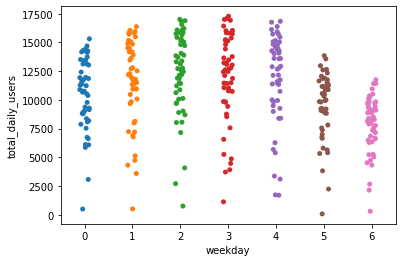

In [122]:
#weekday vs users
sns.stripplot(x="weekday", y="total_daily_users", data=daily_data)

<AxesSubplot:xlabel='hour', ylabel='total_hourly_users'>

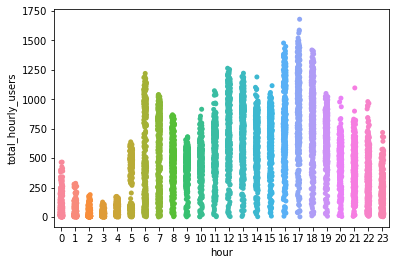

In [123]:
#hour vs users
sns.stripplot(x="hour", y="total_hourly_users", data=hourly_data)

<AxesSubplot:xlabel='rain', ylabel='total_daily_users'>

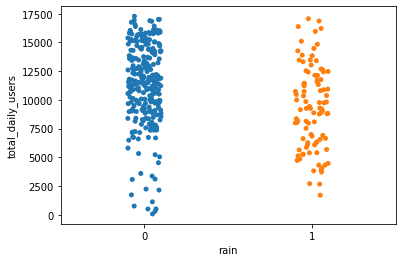

In [124]:
#rain vs users
sns.stripplot(x="rain", y="total_daily_users", data=daily_data)

<AxesSubplot:xlabel='high_temp', ylabel='total_daily_users'>

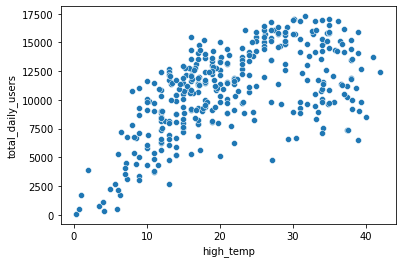

In [125]:
#high temp vs users
sns.scatterplot(data=daily_data, x="high_temp", y="total_daily_users") 

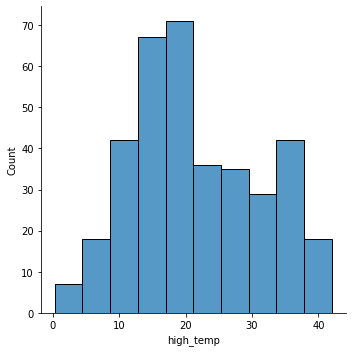

In [126]:
sns.displot(daily_data['high_temp'])

# making the models

## predicting users per day

In [145]:
#X-y split
y = daily_data.total_daily_users
X = daily_data.drop(['total_daily_users', 'date'], axis=1)

In [146]:
#encode weekday
from sklearn.preprocessing import OneHotEncoder

day = pd.DataFrame(X['weekday'])
day_encoder = OneHotEncoder().fit(day)
encoded_day = pd.DataFrame(day_encoder.transform(day).toarray(),columns=day_encoder.categories_)

encoded_day = encoded_day.drop([0], axis=1)

X.drop(['weekday'], axis=1, inplace=True)
X = pd.concat([X, encoded_day], axis=1)

In [147]:
X

,high_temp,rain,"(1,)","(2,)","(3,)","(4,)","(5,)","(6,)"
0,36.2,0,0.0,1.0,0.0,0.0,0.0,0.0
1,34.0,0,0.0,0.0,1.0,0.0,0.0,0.0
2,32.8,0,0.0,0.0,0.0,1.0,0.0,0.0
3,35.5,0,0.0,0.0,0.0,0.0,1.0,0.0
4,37.5,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
360,35.0,0,0.0,0.0,0.0,0.0,1.0,0.0
361,31.0,0,0.0,0.0,0.0,0.0,0.0,1.0
362,29.0,0,0.0,0.0,0.0,0.0,0.0,0.0
363,31.0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [148]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [149]:
#build linear regression model
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

print(model.score(X_train,y_train))
#score .53

0.536232922883231


In [152]:
#test the model
from sklearn.metrics import r2_score, mean_squared_error

predictions = lm.predict(X_test)
r2 = r2_score(y_test, predictions) # score .45
print(r2)

mse = mean_squared_error(y_test, predictions)
print(mse)  #7788830

rmse = math.sqrt(mse)
print(rmse)   #2790

0.44711958061120205
7788830.672797523
2790.84766205494


In [154]:
daily_data.total_daily_users.describe()

count      365.000000
mean     10820.495890
std       3678.319729
min         73.000000
25%       8789.000000
50%      11233.000000
75%      13600.000000
max      17277.000000
Name: total_daily_users, dtype: float64

In [ ]:
#trying with scaling to see if model can be improved

In [155]:
from sklearn.preprocessing import MinMaxScaler

MinMaxtransformer = MinMaxScaler().fit(X_train)
X_normalized = pd.DataFrame(MinMaxtransformer.transform(X_train),columns=X_train.columns)

In [156]:
#build linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(X_normalized, y_train)

print(lm.score(X_normalized,y_train))
#score .53 same as without scaling

0.536232922883231


In [157]:
#tranform X-test
X_test_normalized = pd.DataFrame(MinMaxtransformer.transform(X_test),columns=X_train.columns)

In [158]:
#test the model
predictions = lm.predict(X_test_normalized)
r2 = r2_score(y_test, predictions) # score .45, same as without scaling
print(r2)
mse = mean_squared_error(y_test, predictions) 
print(mse)  #same 
rmse = math.sqrt(mse)
print(rmse)   #same 

0.44711958061120194
7788830.672797524
2790.84766205494


Scaling the numerical features did not improve the model.

## Predicting hourly users

In [166]:
#X-y split
y = hourly_data.total_hourly_users
X = hourly_data.drop(['total_hourly_users', 'date'], axis=1)

In [167]:
#encode the weekdays and hours

day = pd.DataFrame(X['weekday'])
encoded_day = pd.DataFrame(day_encoder.transform(day).toarray(),columns=day_encoder.categories_)
encoded_day = encoded_day.drop([0], axis=1)

hour = pd.DataFrame(X['hour'])
hour_encoder = OneHotEncoder().fit(hour)
encoded_hour = pd.DataFrame(hour_encoder.transform(hour).toarray(),columns=hour_encoder.categories_)
encoded_hour = encoded_hour.drop([0], axis=1)

X.drop(['weekday', 'hour'], axis=1, inplace=True)
X = pd.concat([X, encoded_day, encoded_hour], axis=1)

In [168]:
X

,high_temp,rain,"(1,)","(2,)","(3,)","(4,)","(5,)","(6,)","(1,)","(2,)",...,"(14,)","(15,)","(16,)","(17,)","(18,)","(19,)","(20,)","(21,)","(22,)","(23,)"
0,36.2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36.2,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36.2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36.2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36.2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8725,34.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8726,34.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8727,34.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8728,34.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [169]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [170]:
#build linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

print(lm.score(X_train,y_train))
#score .696

0.6961651371789233


In [171]:
#test the model
predictions = lm.predict(X_test)
r2 = r2_score(y_test, predictions) # score .684
print(r2)
mse = mean_squared_error(y_test, predictions) 
print(mse)  #37368 -reduced 
rmse = math.sqrt(mse)
print(rmse)   #193 - reduced

0.6843966010191713
37368.92653972722
193.3104408451008


In [172]:
y.describe()

count    8730.000000
mean      452.403322
std       348.338977
min         1.000000
25%       100.000000
50%       448.500000
75%       704.000000
max      1679.000000
Name: total_hourly_users, dtype: float64

## Predicting hourly users per station

In [175]:
#X-y split
y = station_data.station_users
X = station_data.drop(['station_users', 'date'], axis=1)

In [176]:
#encode the weekday, hour, and station

day = pd.DataFrame(X['weekday'])
encoded_day = pd.DataFrame(day_encoder.transform(day).toarray(),columns=day_encoder.categories_)
encoded_day = encoded_day.drop([0], axis=1)

hour = pd.DataFrame(X['hour'])
encoded_hour = pd.DataFrame(hour_encoder.transform(hour).toarray(),columns=hour_encoder.categories_)
encoded_hour = encoded_hour.drop([2], axis=1)

station = pd.DataFrame(X['idunplug_station'])
station_encoder = OneHotEncoder().fit(station)
encoded_station = pd.DataFrame(station_encoder.transform(station).toarray(),columns=station_encoder.categories_)
encoded_station = encoded_station.drop([2], axis=1)



X.drop(['weekday', 'idunplug_station', 'hour'], axis=1, inplace=True)
X = pd.concat([X, encoded_day, encoded_station, encoded_hour], axis=1)

In [178]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [179]:
#build linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

print(lm.score(X_train,y_train))
#score .26 down from  from .68 using info from all stations

0.26537063718985787


In [180]:
#test the model
predictions = lm.predict(X_test)
predictions = predictions. astype(int)
r2 = r2_score(y_test, predictions) # score .22 
print(r2)
mse = mean_squared_error(y_test, predictions) 
print(mse)  #5
rmse = math.sqrt(mse)
print(rmse)   #2.2

0.2176476844090427
4.923179816521154
2.2188239715040834


In [181]:
y.describe()

count    1.241012e+06
mean     3.182468e+00
std      2.519880e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      3.900000e+01
Name: station_users, dtype: float64

The models show that weather, day of the week, and time are factors that affect usage of the BiciMAD system but also there are other unidentified factors as well. I think the model could be improved by using hourly weather data. I also think it could be beneficial to further explore the demographics of the users and the stations if that data existed.  